In [1]:
Sys.setlocale("LC_ALL", "C")  
trials = read.csv("./data/clinical_trial.csv", stringsAsFactors=FALSE)

[1] "C"

In [2]:
str(trials)

'data.frame':	1860 obs. of  3 variables:
 $ title   : chr  "Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962)." "Cell mediated immune status in malignancy--pretherapy and post-therapy assessment." "Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breast cancer: phase "| __truncated__ "Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by Paclitaxel for early breast can"| __truncated__ ...
 $ abstract: chr  "" "Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population before and after in"| __truncated__ "BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with unfavorable outcom"| __truncated__ "BACKGROUND: Taxanes are among the most active drugs for the treatment of metastatic breast cancer, and, as a consequence, they "| __trunc

In [3]:
summary(nchar(trials$abstract))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1196    1583    1481    1821    3708 

In [4]:
table(nchar(trials$abstract))


   0  243  273  282  288  290  332  337  345  363  378  420  434  444  447  454 
 112    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 463  464  465  468  469  477  482  483  489  491  492  501  507  511  514  519 
   1    1    1    1    1    2    1    1    1    1    1    1    1    1    1    1 
 528  541  543  548  559  563  566  567  576  584  585  588  591  593  600  601 
   1    1    1    2    1    1    2    1    1    1    1    1    1    1    1    1 
 604  610  615  617  620  627  628  631  634  639  644  645  647  655  656  660 
   1    1    1    2    1    1    2    1    1    1    2    1    1    1    2    2 
 666  671  673  675  681  685  688  695  700  701  713  717  720  721  722  723 
   1    1    1    1    1    1    1    3    1    1    1    2    1    1    1    1 
 725  730  733  735  739  740  741  765  773  775  777  781  782  783  788  795 
   1    1    1    1    1    1    1    2    1    2    1    3    1    1    1    1 
 798  802  805  806  808  8

In [5]:
which.min(nchar(trials$title))

[1] 1258

In [6]:
trials$title[1258]

[1] "A decade of letrozole: FACE."

In [7]:
library(tm)

Loading required package: NLP


In [8]:
corpusTitle = Corpus(VectorSource(trials$title))
corpusTitle = tm_map(corpusTitle, content_transformer(tolower))
corpusTitle = tm_map(corpusTitle, PlainTextDocument)
corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusTitle = tm_map(corpusTitle, removeWords, stopwords("english"))
corpusTitle = tm_map(corpusTitle, stemDocument)
dtmTitle = DocumentTermMatrix(corpusTitle)
dtmTitle = removeSparseTerms(dtmTitle, 0.95)
dtmTitle = as.data.frame(as.matrix(dtmTitle))

corpusAbstract = Corpus(VectorSource(trials$abstract))
corpusAbstract = tm_map(corpusAbstract, content_transformer(tolower))
corpusAbstract = tm_map(corpusAbstract, PlainTextDocument)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords("english"))
corpusAbstract = tm_map(corpusAbstract, stemDocument)
dtmAbstract = DocumentTermMatrix(corpusAbstract)
dtmAbstract = removeSparseTerms(dtmAbstract, 0.95)
dtmAbstract = as.data.frame(as.matrix(dtmAbstract))

In [9]:
str(dtmTitle)

'data.frame':	1860 obs. of  31 variables:
 $ adjuv          : num  0 0 0 0 0 0 0 0 1 0 ...
 $ advanc         : num  0 0 0 0 0 0 1 0 0 0 ...
 $ breast         : num  0 0 1 1 1 1 0 1 1 1 ...
 $ cancer         : num  1 0 1 1 1 1 0 1 1 2 ...
 $ chemotherapi   : num  0 0 0 0 1 1 0 0 0 0 ...
 $ clinic         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ combin         : num  0 0 0 0 1 0 1 0 0 0 ...
 $ compar         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cyclophosphamid: num  0 0 0 1 0 0 0 0 0 0 ...
 $ docetaxel      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ doxorubicin    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ earli          : num  0 0 1 1 0 0 0 1 0 0 ...
 $ effect         : num  0 0 0 0 1 0 0 1 0 1 ...
 $ group          : num  0 0 0 0 0 0 0 0 1 1 ...
 $ iii            : num  0 0 1 0 0 0 0 0 0 1 ...
 $ metastat       : num  0 0 0 0 1 0 0 0 0 0 ...
 $ patient        : num  0 0 0 0 1 0 1 0 1 1 ...
 $ phase          : num  0 0 1 1 0 0 0 0 0 1 ...
 $ plus           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ postmenopaus   : num  0 

In [10]:
str(dtmAbstract)

'data.frame':	1860 obs. of  335 variables:
 $ 0001           : num  0 0 0 0 0 7 0 0 0 0 ...
 $ 001            : num  0 0 0 1 0 0 0 1 0 0 ...
 $ 005            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 100            : num  0 1 0 0 0 0 0 0 0 0 ...
 $ 500            : num  0 0 1 0 2 0 0 0 0 0 ...
 $ 5fluorouracil  : num  0 0 0 0 0 1 0 0 0 0 ...
 $ accord         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ achiev         : num  0 0 0 0 0 0 1 0 1 0 ...
 $ activ          : num  0 2 0 1 0 0 1 0 0 0 ...
 $ addit          : num  0 0 2 0 0 0 0 0 0 0 ...
 $ adjuv          : num  0 0 0 2 0 1 0 2 4 0 ...
 $ administ       : num  0 0 0 0 0 0 1 0 0 0 ...
 $ administr      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ advanc         : num  0 0 0 0 0 0 1 0 0 0 ...
 $ advers         : num  0 0 0 0 0 0 0 0 0 4 ...
 $ age            : num  0 0 0 1 0 0 0 0 0 0 ...
 $ agent          : num  0 0 0 0 1 0 1 0 0 0 ...
 $ aim            : num  0 0 0 0 0 1 0 0 0 0 ...
 $ alon           : num  0 0 0 0 0 0 0 0 3 0 ...
 $ also           : num  0

In [11]:
which.max(colSums(dtmAbstract))

patient 
    212

In [12]:
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))
colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

In [13]:
dtm = cbind(dtmTitle, dtmAbstract)

Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

In [14]:
dtm$trial = trials$trial

In [15]:
str(dtm)

'data.frame':	1860 obs. of  367 variables:
 $ Tadjuv          : num  0 0 0 0 0 0 0 0 1 0 ...
 $ Tadvanc         : num  0 0 0 0 0 0 1 0 0 0 ...
 $ Tbreast         : num  0 0 1 1 1 1 0 1 1 1 ...
 $ Tcancer         : num  1 0 1 1 1 1 0 1 1 2 ...
 $ Tchemotherapi   : num  0 0 0 0 1 1 0 0 0 0 ...
 $ Tclinic         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Tcombin         : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Tcompar         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Tcyclophosphamid: num  0 0 0 1 0 0 0 0 0 0 ...
 $ Tdocetaxel      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Tdoxorubicin    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Tearli          : num  0 0 1 1 0 0 0 1 0 0 ...
 $ Teffect         : num  0 0 0 0 1 0 0 1 0 1 ...
 $ Tgroup          : num  0 0 0 0 0 0 0 0 1 1 ...
 $ Tiii            : num  0 0 1 0 0 0 0 0 0 1 ...
 $ Tmetastat       : num  0 0 0 0 1 0 0 0 0 0 ...
 $ Tpatient        : num  0 0 0 0 1 0 1 0 1 1 ...
 $ Tphase          : num  0 0 1 1 0 0 0 0 0 1 ...
 $ Tplus           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Tpos

In [16]:
library(caTools)
set.seed(144)
split = sample.split(dtm$trial, SplitRatio=0.7)
train = subset(dtm, split==TRUE)
test = subset(dtm, split==FALSE)

In [17]:
table(test$trial)


  0   1 
313 245 

In [18]:
313/(313+245)

[1] 0.5609319

In [19]:
library(rpart)
library(rpart.plot)

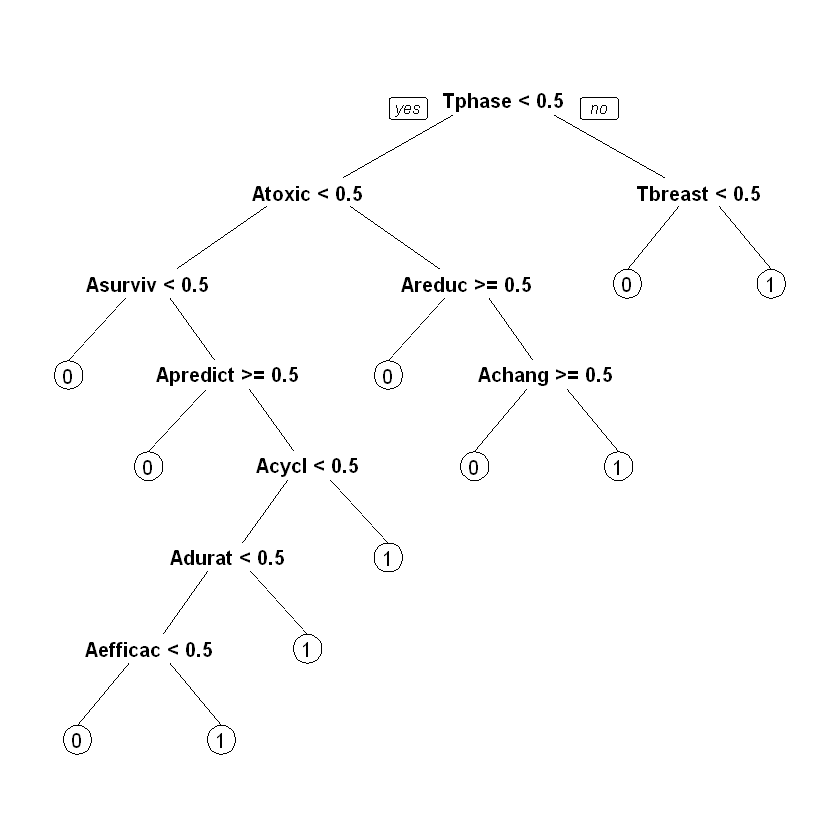

In [20]:
trialCART = rpart(trial ~ ., data=train, method="class")
prp(trialCART)

In [21]:
train.pred = predict(trialCART, newdata=train)

In [23]:
max(train.pred[,2])

[1] 0.8718861

In [24]:
test.pred = predict(trialCART, newdata=test)
max(test.pred[,2])

[1] 0.8718861

In [25]:
table(train$trial, train.pred[,2] >= 0.5)

   
    FALSE TRUE
  0   631   99
  1   131  441

In [26]:
(631+441)/(631+99+131+441)

[1] 0.8233487

In [27]:
441/(131+441)

[1] 0.770979

In [28]:
631/(631+99)

[1] 0.8643836

In [29]:
table(test$trial, test.pred[,2] >= 0.5)

   
    FALSE TRUE
  0   261   52
  1    83  162

In [30]:
(261+162)/(261+52+83+162)

[1] 0.7580645

In [31]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [32]:
predROCR = prediction(test.pred[,2], test$trial)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.8371063